In [141]:
import time

import matplotlib.pyplot as plt
import torch

from src.model.activation import Linear, Relu
from src.model.base import NeuralNetwork
from src.model.layer import FullyConnected, Input
from src.model.loss import MeanSquaredError
from src.model.metric import R2Score
from src.model.optimizer import SGD, Adam

# Functions (2d and 3d) whose values we will predict using a neural network

In [142]:
def func_quad(arg):
    return 0.5 * arg**2 + 2 * arg - 1

def func_linear(arg):
    return -1.0 * arg - 1

def func_quad_3d(arg_x, arg_y):
    return 0.2 * arg_x**2 + 0.2 * arg_y**2

def func_sin_plus_cos_3d(arg_x, arg_y):
    return torch.sin(arg_x) + torch.cos(arg_y)

# Helper functions for plotting graphs of functions and displaying changes in loss and R2 score with the change of epochs

In [143]:
def plot_func(x, y, title):
    plt.figure(figsize=(10, 8))
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [144]:
def plot_func_3d(x, y, z, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, cmap="viridis")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("f(X, Y)")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [145]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

In [146]:
def plot_r2_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('R2 score')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

# Functions for generating train/test data

In [147]:
def generate_train_test_data(func):

    x = torch.linspace(-5, 5, 100)

    train_data = []

    for x_i in x:
        train_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    x = torch.linspace(-5, 5, 30)

    test_data = []

    for x_i in x:
        test_data.append(
            {
                "input": [x_i],
                "output": [func(x_i)],
            }
        )

    return train_data, test_data

In [148]:
def generate_train_test_data_3d(func_3d):

    x = torch.linspace(-5, 5, 50)
    y = torch.linspace(-5, 5, 50)
    x, y = torch.meshgrid(x, y, indexing="ij")

    train_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            train_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    x = torch.linspace(-5, 5, 30)
    y = torch.linspace(-5, 5, 30)
    x, y = torch.meshgrid(x, y, indexing="ij")

    test_data = []

    for i in range(x.size(0)):
        for j in range(x.size(1)):
            test_data.append(
                {
                    "input": [x[i][j], y[i][j]],
                    "output": [func_3d(x[i][j], y[i][j])],
                }
            )

    return train_data, test_data

# Creating model for predicting values of the linear function "y = −x − 1" and ploting graphs and changes for loss and r2 score

In [149]:
train_dataset, test_dataset = generate_train_test_data(func_linear)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=SGD(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 50

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/50, train loss: 2.0247, train R2 score: 0.5237, test loss: 0.7411, test R2 score: 0.8336
Epoch: 2/50, train loss: 0.254, train R2 score: 0.9403, test loss: 0.0446, test R2 score: 0.99
Epoch: 3/50, train loss: 0.0234, train R2 score: 0.9945, test loss: 0.0154, test R2 score: 0.9966
Epoch: 4/50, train loss: 0.0126, train R2 score: 0.997, test loss: 0.0106, test R2 score: 0.9976
Epoch: 5/50, train loss: 0.0091, train R2 score: 0.9979, test loss: 0.0079, test R2 score: 0.9982
Epoch: 6/50, train loss: 0.0068, train R2 score: 0.9984, test loss: 0.0058, test R2 score: 0.9987
Epoch: 7/50, train loss: 0.005, train R2 score: 0.9988, test loss: 0.0044, test R2 score: 0.999
Epoch: 8/50, train loss: 0.0038, train R2 score: 0.9991, test loss: 0.0034, test R2 score: 0.9992
Epoch: 9/50, train loss: 0.0029, train R2 score: 0.9993, test loss: 0.0026, test R2 score: 0.9994
Epoch: 10/50, train loss: 0.0022, train R2 score: 0.9995, test loss: 0.0022, test R2 score: 0.9995
Epoch: 11/50, train loss:

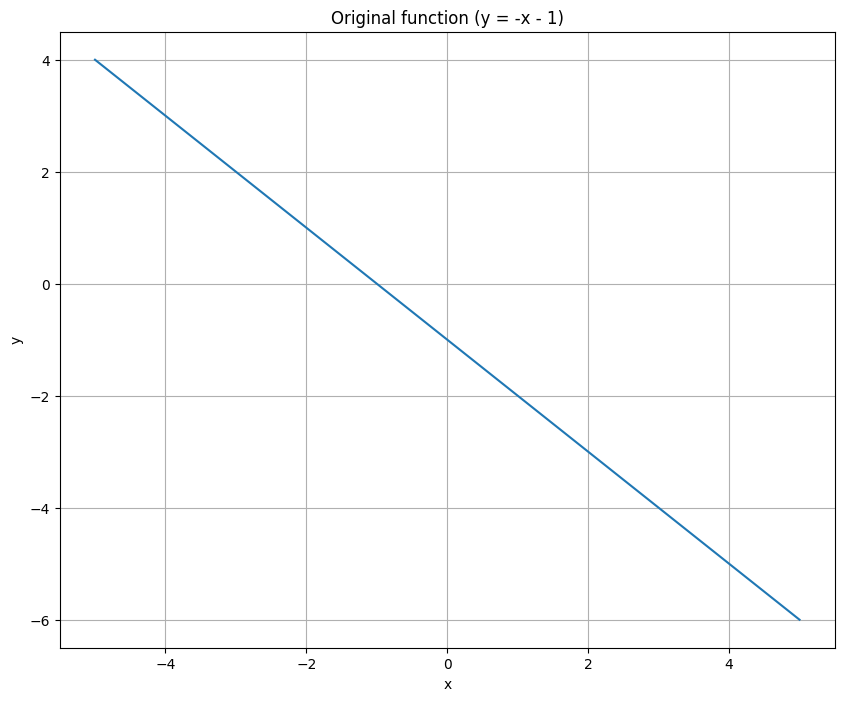

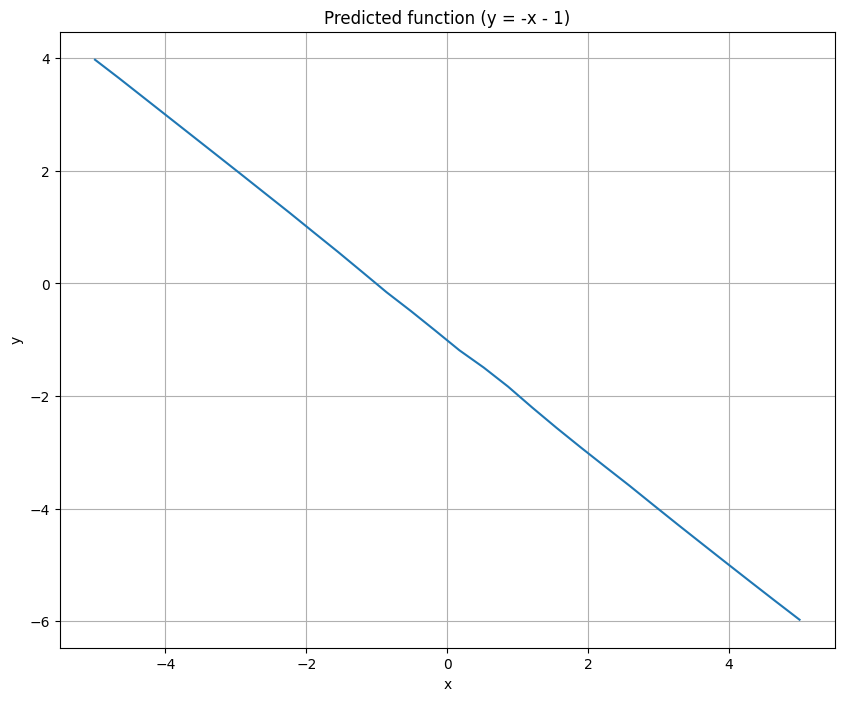

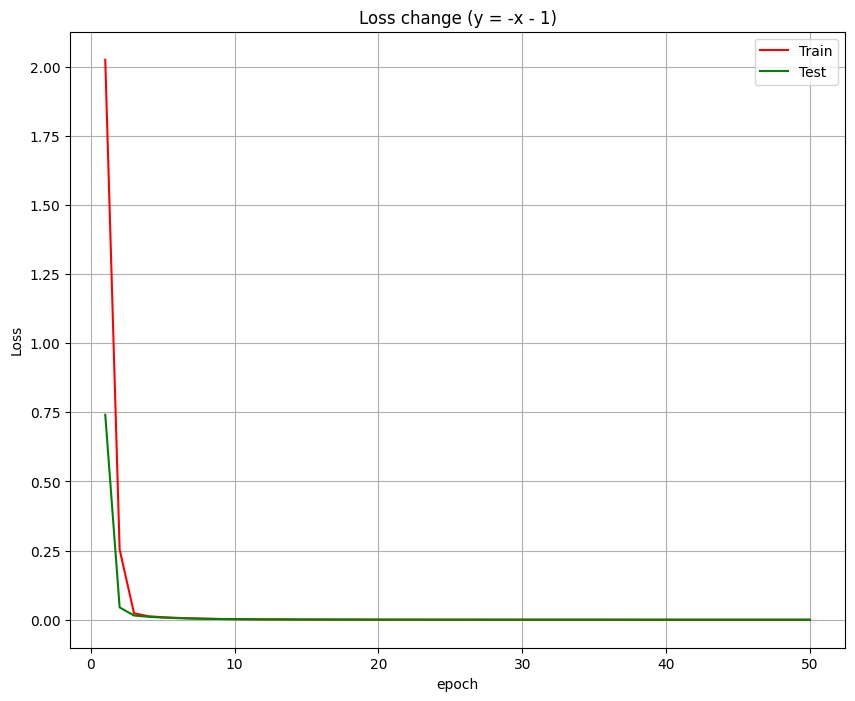

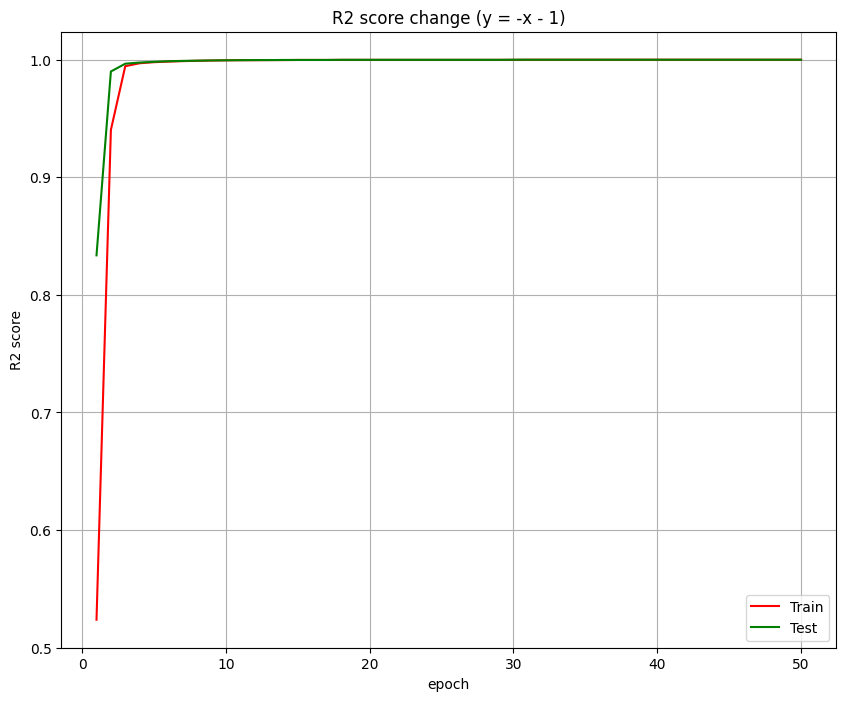

In [150]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = -x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = -x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = -x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = -x - 1)')

# Creating model for predicting values of the quadratic function "y = 0.5 * x**2 + 2 * x - 1" and ploting graphs and changes for loss and r2 score

In [151]:
train_dataset, test_dataset = generate_train_test_data(func_quad)

layers = [
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(128, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(1),
    layers,
    optimizer=Adam(learning_rate=0.0005),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 30

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/30, train loss: 22.068, train R2 score: 0.0892, test loss: 4.9967, test R2 score: 0.8058
Epoch: 2/30, train loss: 1.7774, train R2 score: 0.9266, test loss: 0.9951, test R2 score: 0.9613
Epoch: 3/30, train loss: 0.7175, train R2 score: 0.9704, test loss: 0.4273, test R2 score: 0.9834
Epoch: 4/30, train loss: 0.4162, train R2 score: 0.9828, test loss: 0.4927, test R2 score: 0.9808
Epoch: 5/30, train loss: 0.3306, train R2 score: 0.9864, test loss: 0.2694, test R2 score: 0.9895
Epoch: 6/30, train loss: 0.2555, train R2 score: 0.9895, test loss: 0.1723, test R2 score: 0.9933
Epoch: 7/30, train loss: 0.2074, train R2 score: 0.9914, test loss: 0.1713, test R2 score: 0.9933
Epoch: 8/30, train loss: 0.1026, train R2 score: 0.9958, test loss: 0.1462, test R2 score: 0.9943
Epoch: 9/30, train loss: 0.1091, train R2 score: 0.9955, test loss: 0.1187, test R2 score: 0.9954
Epoch: 10/30, train loss: 0.1067, train R2 score: 0.9956, test loss: 0.1025, test R2 score: 0.996
Epoch: 11/30, train 

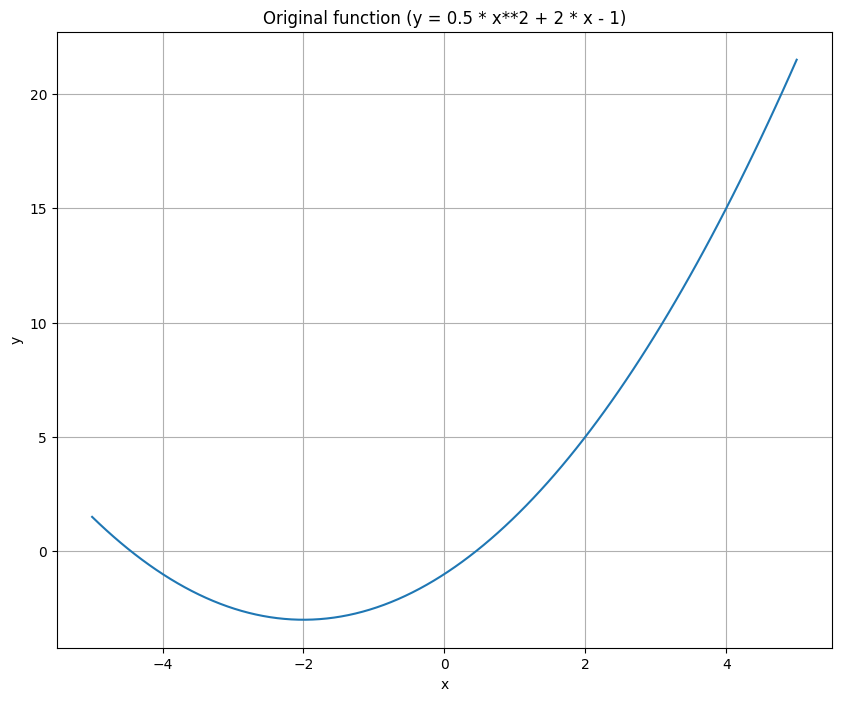

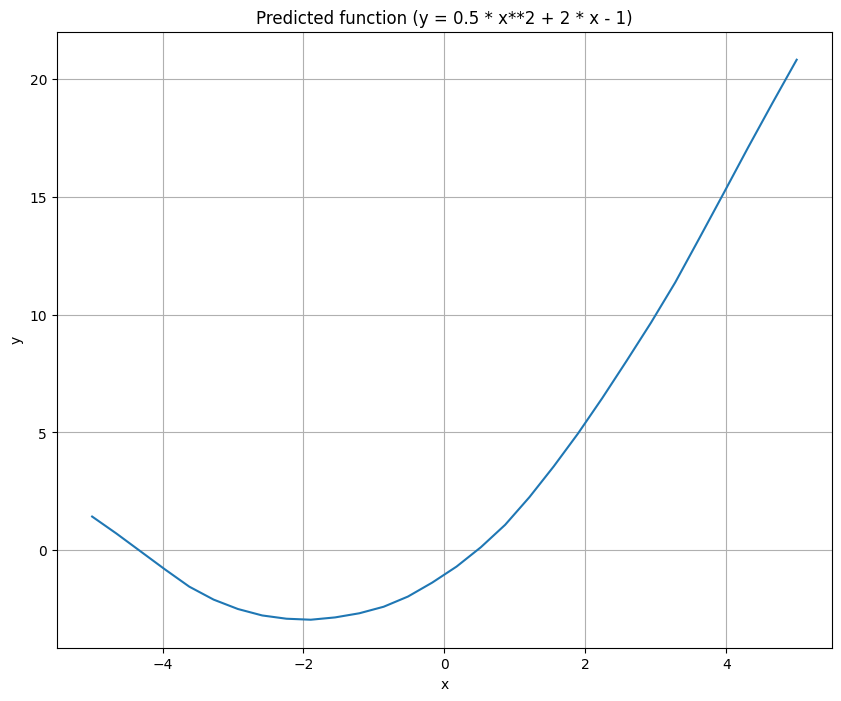

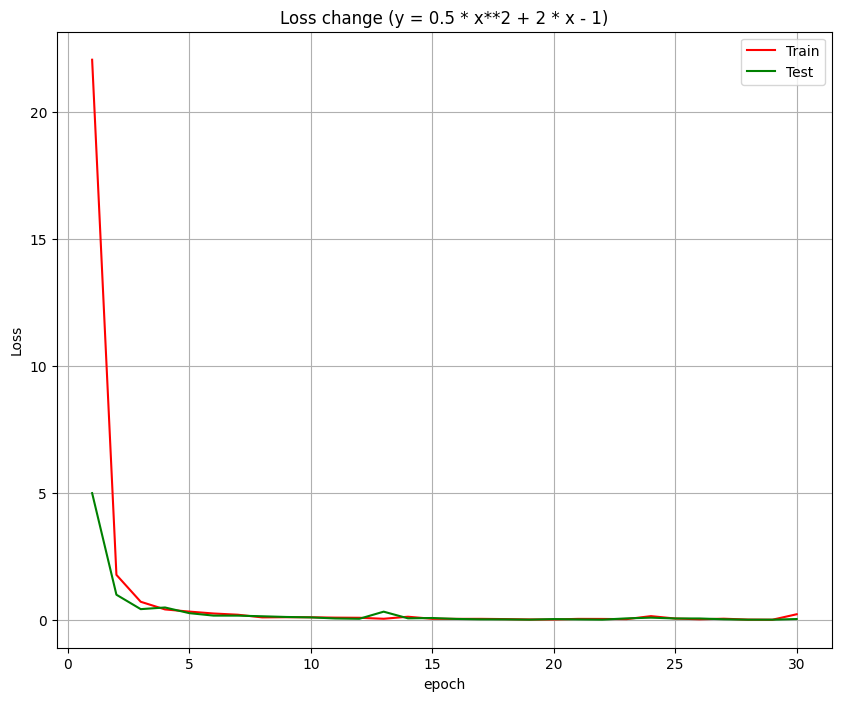

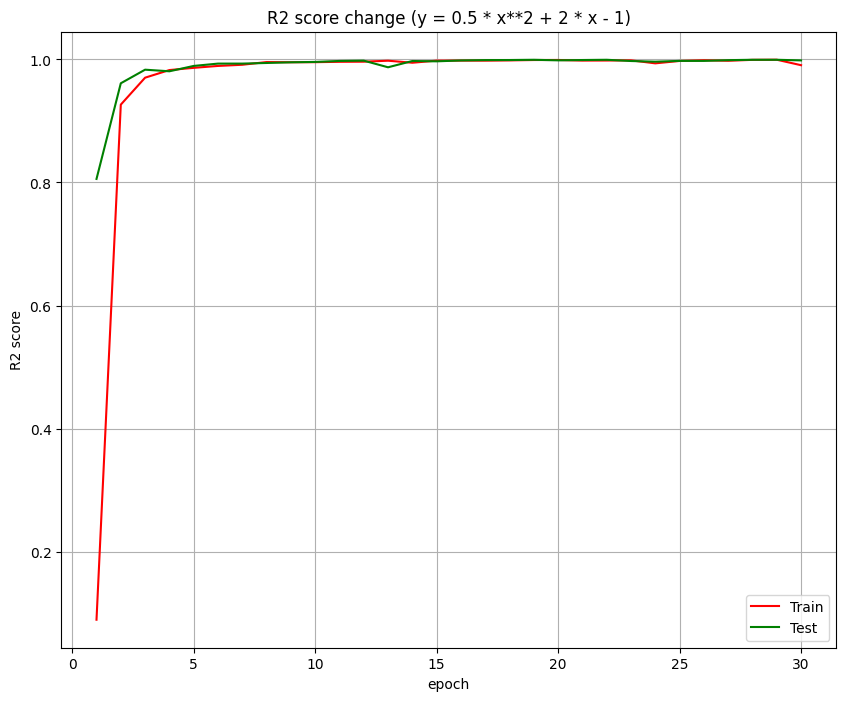

In [152]:
plot_func(
    [d["input"][0].item() for d in train_dataset],
    [d["output"][0].item() for d in train_dataset],
    "Original function (y = 0.5 * x**2 + 2 * x - 1)",
)

plot_func(
    [d["input"][0].item() for d in test_dataset],
    [pred[0].item() for pred in prediction],
    "Predicted function (y = 0.5 * x**2 + 2 * x - 1)"
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (y = 0.5 * x**2 + 2 * x - 1)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (y = 0.5 * x**2 + 2 * x - 1)')

# Creating model for predicting values of the 3d quadratic function "z = 0.2 * x**2 + 0.2 * y**2" and ploting graphs and changes for loss and r2 score

In [153]:
train_dataset, test_dataset = generate_train_test_data_3d(func_quad_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 2.8898, train R2 score: -0.2018, test loss: 0.3396, test R2 score: 0.8658
Epoch: 2/10, train loss: 0.1945, train R2 score: 0.9191, test loss: 0.0939, test R2 score: 0.9629
Epoch: 3/10, train loss: 0.0504, train R2 score: 0.979, test loss: 0.038, test R2 score: 0.985
Epoch: 4/10, train loss: 0.0231, train R2 score: 0.9904, test loss: 0.0222, test R2 score: 0.9912
Epoch: 5/10, train loss: 0.0124, train R2 score: 0.9948, test loss: 0.0147, test R2 score: 0.9942
Epoch: 6/10, train loss: 0.0067, train R2 score: 0.9972, test loss: 0.0053, test R2 score: 0.9979
Epoch: 7/10, train loss: 0.0036, train R2 score: 0.9985, test loss: 0.0071, test R2 score: 0.9972
Epoch: 8/10, train loss: 0.0028, train R2 score: 0.9988, test loss: 0.0032, test R2 score: 0.9988
Epoch: 9/10, train loss: 0.0019, train R2 score: 0.9992, test loss: 0.003, test R2 score: 0.9988
Epoch: 10/10, train loss: 0.0016, train R2 score: 0.9994, test loss: 0.003, test R2 score: 0.9988
--- 13.965106964111328 

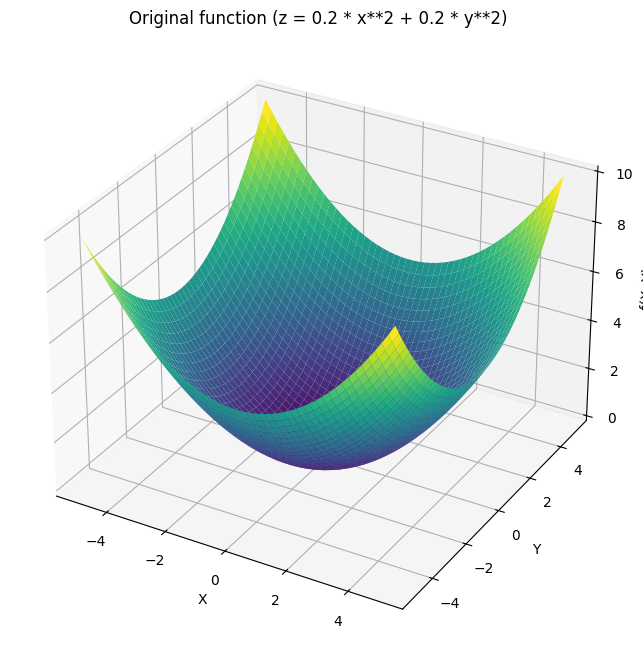

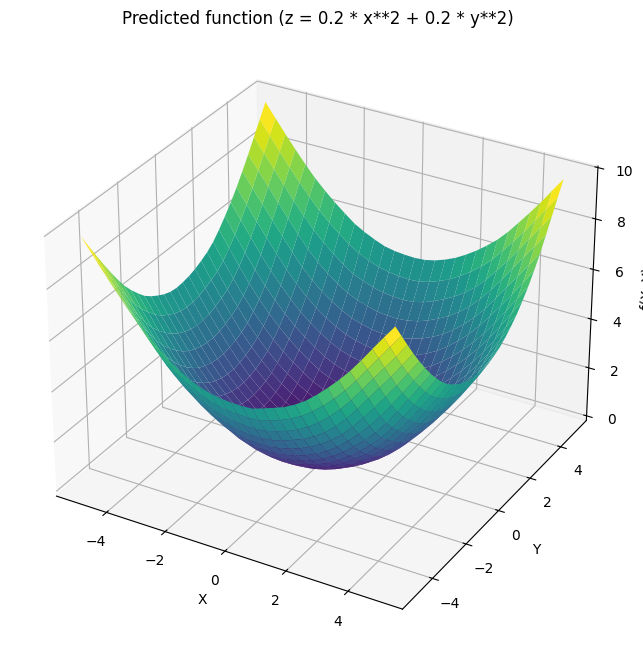

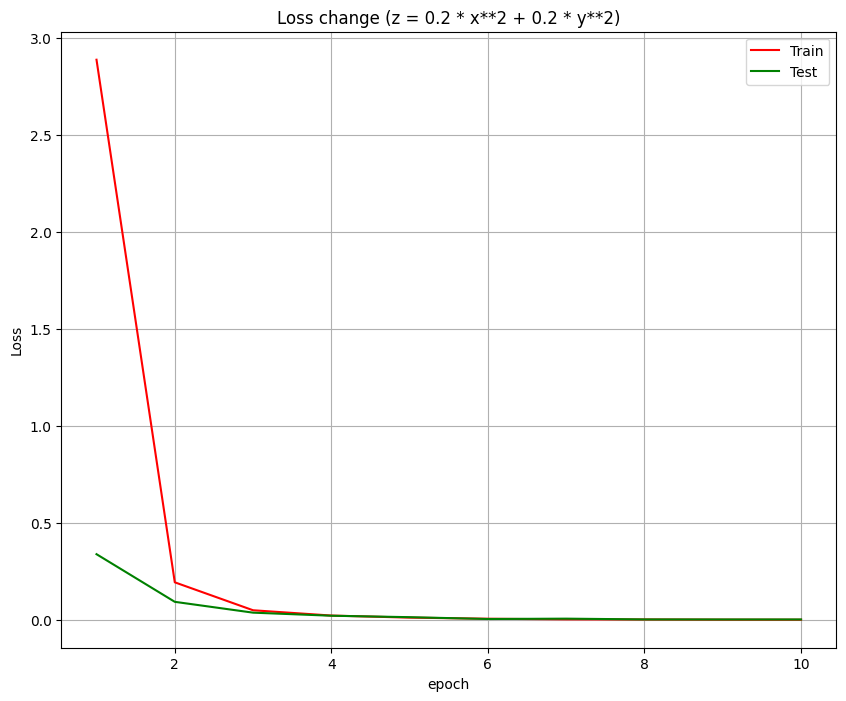

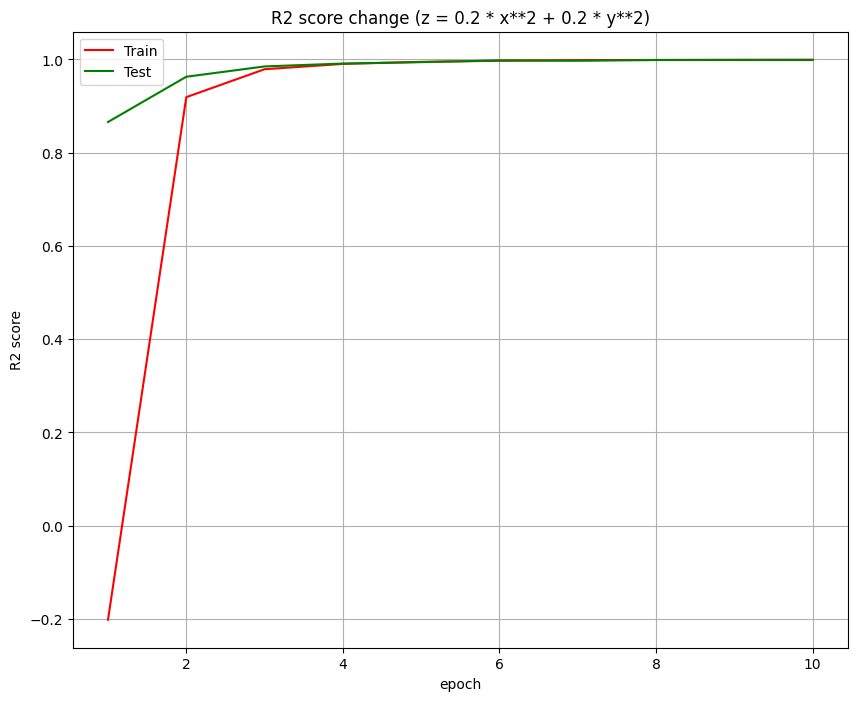

In [154]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = 0.2 * x**2 + 0.2 * y**2)'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = 0.2 * x**2 + 0.2 * y**2)')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = 0.2 * x**2 + 0.2 * y**2)')

# Creating model for predicting values of the 3d function "z = sin(x) + cos(y)" and ploting graphs and changes for loss and r2 score

In [155]:
train_dataset, test_dataset = generate_train_test_data_3d(func_sin_plus_cos_3d)

layers = [
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(256, Relu()),
    FullyConnected(1, Linear()),
]

nn = NeuralNetwork(
    Input(2),
    layers,
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metric=R2Score()
)

epochs = 10

start_time = time.time()

history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=16, verbose=True)

print("--- %s seconds ---" % (time.time() - start_time))

epoch = [epoch_data['epoch'] for epoch_data in history]
train_loss = [epoch_data['train_loss'] for epoch_data in history]
test_loss = [epoch_data['test_loss'] for epoch_data in history]
train_metric = [epoch_data['train_metric'] for epoch_data in history]
test_metric = [epoch_data['test_metric'] for epoch_data in history]

prediction = nn.predict(test_dataset)

Epoch: 1/10, train loss: 0.3262, train R2 score: 0.3254, test loss: 0.1945, test R2 score: 0.5989
Epoch: 2/10, train loss: 0.1156, train R2 score: 0.7609, test loss: 0.0628, test R2 score: 0.8704
Epoch: 3/10, train loss: 0.0426, train R2 score: 0.912, test loss: 0.0362, test R2 score: 0.9253
Epoch: 4/10, train loss: 0.0193, train R2 score: 0.9601, test loss: 0.0208, test R2 score: 0.9571
Epoch: 5/10, train loss: 0.011, train R2 score: 0.9773, test loss: 0.0122, test R2 score: 0.9749
Epoch: 6/10, train loss: 0.0063, train R2 score: 0.987, test loss: 0.0097, test R2 score: 0.9801
Epoch: 7/10, train loss: 0.0048, train R2 score: 0.99, test loss: 0.0037, test R2 score: 0.9924
Epoch: 8/10, train loss: 0.0032, train R2 score: 0.9933, test loss: 0.0038, test R2 score: 0.9923
Epoch: 9/10, train loss: 0.0024, train R2 score: 0.995, test loss: 0.0031, test R2 score: 0.9936
Epoch: 10/10, train loss: 0.0021, train R2 score: 0.9957, test loss: 0.0026, test R2 score: 0.9946
--- 15.156267166137695 se

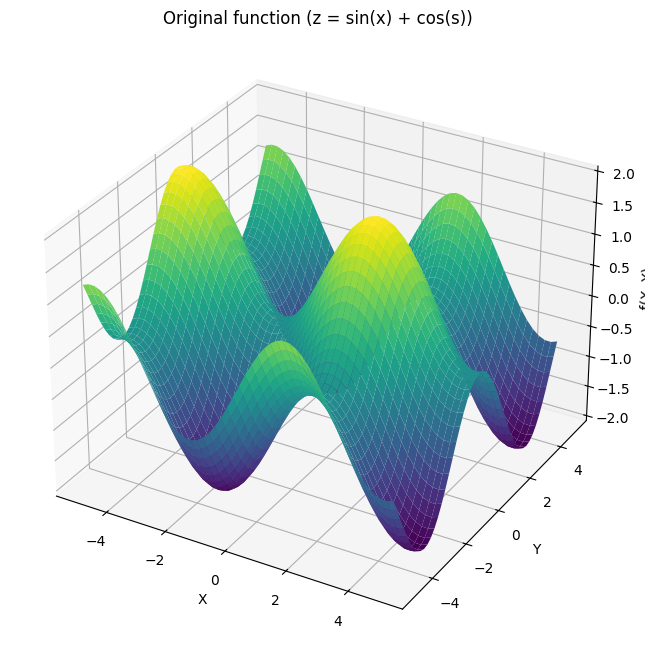

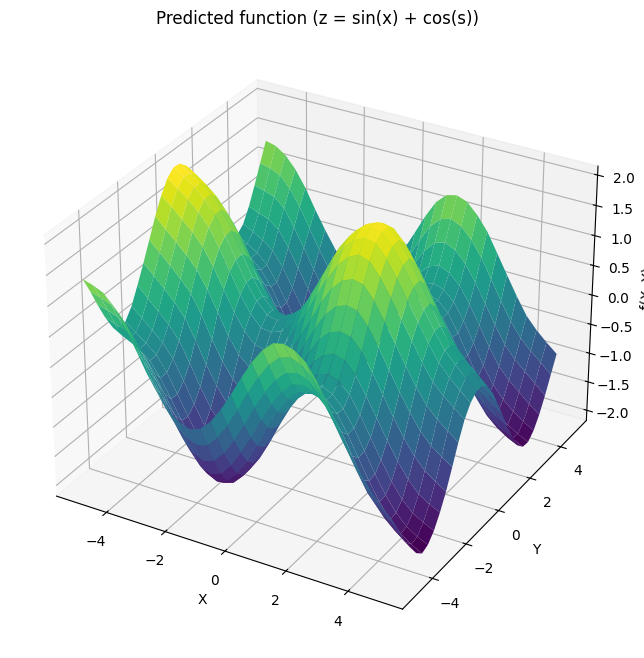

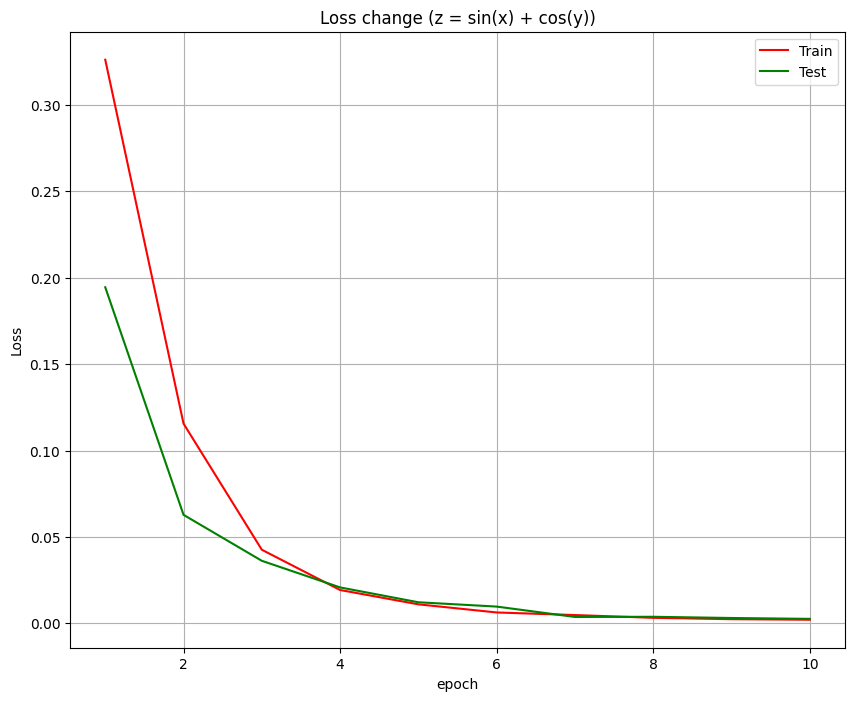

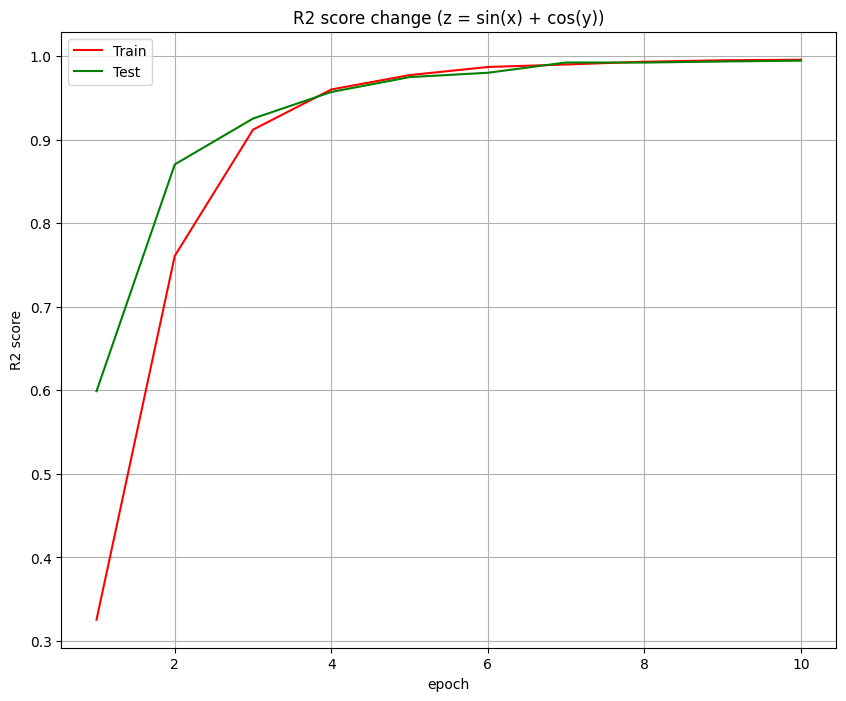

In [156]:
plot_func_3d(
    torch.tensor([[train_dataset[j*50 + i]['input'][0].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['input'][1].item() for i in range(50)] for j in range(50)]),
    torch.tensor([[train_dataset[j*50 + i]['output'][0].item() for i in range(50)] for j in range(50)]),
    'Original function (z = sin(x) + cos(s))'
)

plot_func_3d(
    torch.tensor([[test_dataset[j*30 + i]['input'][0].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[test_dataset[j*30 + i]['input'][1].item() for i in range(30)] for j in range(30)]),
    torch.tensor([[prediction[j*30 + i][0].item() for i in range(30)] for j in range(30)]),
    'Predicted function (z = sin(x) + cos(s))'
)

plot_loss(epoch, train_loss, test_loss, 'Loss change (z = sin(x) + cos(y))')
plot_r2_score(epoch, train_metric, test_metric, 'R2 score change (z = sin(x) + cos(y))')